In [1]:
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
from snippets import unpack_file, MyCallback, plot_graphs

In [2]:
tf.__version__

'2.1.0'

In [4]:
DATA_FILE = "intel-image-classification.zip"
DIR = "images"

unpack_file(DATA_FILE, DIR)

Files unzipped to /images


In [6]:
import os

os.listdir(TRAIN_DIR)

NameError: name 'TRAIN_DIR' is not defined

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

TRAIN_DIR = "images/seg_train/seg_train"
TEST_DIR = "images/seg_test/seg_test"

train_generator = image_generator.flow_from_directory(TRAIN_DIR, target_size=(150, 150), class_mode="categorical", batch_size=32)
test_generator = image_generator.flow_from_directory(TEST_DIR, target_size=(150, 150), class_mode="categorical", batch_size=32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax")
])


print(model.summary())

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_____________________________________

In [4]:
tf.keras.backend.clear_session()

class MyCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}) -> None:
        if logs["acc"] > 0.9:
            print("Reached 90% accuracy. The training is cancelled")
            self.model.stop_training = True
            
my_callback = MyCallback()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss="categorical_crossentropy", metrics=["acc"])
history = model.fit(train_generator, validation_data=test_generator, epochs=2, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 439 steps, validate for 94 steps
Epoch 1/2
439/439 [==============================] - 67s 152ms/step - loss: 1.2141 - acc: 0.5889 - val_loss: 0.8293 - val_acc: 0.6907
Epoch 2/2
439/439 [==============================] - 12s 27ms/step - loss: 0.7067 - acc: 0.7471 - val_loss: 0.6306 - val_acc: 0.7783


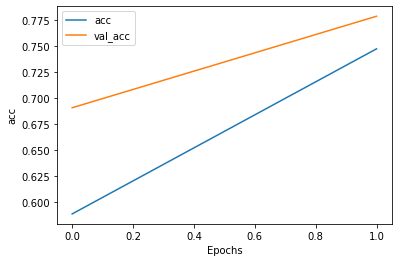

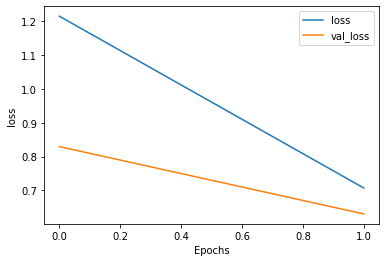

In [6]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
# To Do
# Show sample images
# Visualize convolutions
# Transfer learning